## Moving Average Indicator


Arthmetic mean of a given asset price over the specififed number of days in the past.

Calculating the moving average


Sma = 1/k E(si),i=n-k+1, n

### Good reference on Pandas Data Reader
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#stooq-index-data

In [4]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mpl_dates
%matplotlib inline

In [5]:
stock = 'GOOG'
start_date = dt.datetime(2010,1,1)
end_date = dt.datetime(2011,1,1)

In [6]:
#result = yf.download(stock, start_date, end_date)
result_df = web.DataReader('^DJI', 'stooq',start=start_date,end=end_date)
result_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-30,33795.43,34589.77,33583.77,34589.77,386088213.0
2022-11-29,33847.80,33933.91,33662.45,33852.53,283093962.0
2022-11-28,34275.91,34303.88,33799.35,33849.46,303537409.0
2022-11-25,34213.04,34386.51,34199.57,34347.03,132181690.0
2022-11-23,34091.57,34262.07,34004.64,34194.06,237182894.0


In [7]:
result_df['Price'] = result_df['Close']
#result_df = pd.DataFrame(result)

In [8]:
result_df.head()

,Open,High,Low,Close,Volume,Price
Date,,,,,,
2022-11-30,33795.43,34589.77,33583.77,34589.77,386088213.0,34589.77
2022-11-29,33847.80,33933.91,33662.45,33852.53,283093962.0,33852.53
2022-11-28,34275.91,34303.88,33799.35,33849.46,303537409.0,33849.46
2022-11-25,34213.04,34386.51,34199.57,34347.03,132181690.0,34347.03
2022-11-23,34091.57,34262.07,34004.64,34194.06,237182894.0,34194.06


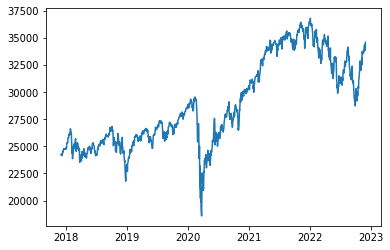

In [9]:
plt.plot(result_df['Price']);

In [10]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

result_df['Short SMA'] = result_df['Price'].rolling(window=30).mean()

In [11]:
result_df['Long SMA'] = result_df['Price'].rolling(window=200).mean()

In [12]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

result_df['Weighted Short EMA'] = result_df['Price'].ewm(span=30, adjust=False).mean()

In [13]:
result_df['Weighted Long EMA'] = result_df['Price'].ewm(span=200, adjust=False).mean()

In [14]:
result_df.dropna()

,Open,High,Low,Close,Volume,Price,Short SMA,Long SMA,Weighted Short EMA,Weighted Long EMA
Date,,,,,,,,,,
2022-02-15,34686.19,35047.79,34686.19,34988.84,359542132.0,34988.84,33966.491333,32464.40040,33932.817305,33160.163220
2022-02-14,34694.50,34744.56,34304.28,34566.17,445148572.0,34566.17,33942.224000,32464.28240,33973.678769,33174.153337
2022-02-11,35267.89,35431.15,34620.52,34738.06,477808044.0,34738.06,33934.963000,32468.71005,34022.993687,33189.714597
2022-02-10,35630.81,35800.24,35100.72,35241.59,478651056.0,35241.59,33947.641333,32475.67070,34101.612804,33210.131268
2022-02-09,35614.90,35824.28,35614.90,35768.06,421274330.0,35768.06,33982.978667,32482.77585,34209.125527,33235.583295
...,...,...,...,...,...,...,...,...,...,...
2017-12-07,24116.60,24262.88,24101.24,24211.48,319136681.0,24211.48,25060.355667,25025.38900,24869.308382,25040.039082
2017-12-06,24171.90,24229.35,24134.49,24140.91,312736164.0,24140.91,24991.232667,25013.28330,24822.314938,25031.092524
2017-12-05,24335.01,24349.74,24155.28,24180.64,371251140.0,24180.64,24928.196667,25000.46900,24780.916555,25022.630310


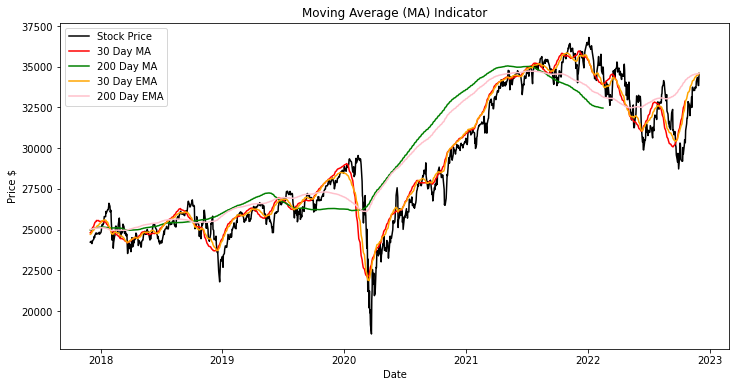

In [15]:
plt.figure(figsize=(12,6))
plt.plot(result_df['Price'], label='Stock Price', color='black')
plt.plot(result_df['Short SMA'], label='30 Day MA', color='red')
plt.plot(result_df['Long SMA'],label='200 Day MA', color='green')

plt.plot(result_df['Weighted Short EMA'], label='30 Day EMA', color='orange')
plt.plot(result_df['Weighted Long EMA'],label='200 Day EMA', color='pink')
plt.title('Moving Average (MA) Indicator')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend();
plt.show();

In [27]:
# MACD

result_df['exp12'] = result_df['Close'].ewm(span=12, adjust=False).mean()
result_df['exp26'] = result_df['Close'].ewm(span=26,adjust=False).mean()
result_df['macd'] = result_df['exp12'] = result_df['exp26']
result_df['signal'] = result_df['macd'].ewm(span=9, adjust=False).mean()
result_df['histogram'] = result_df['macd']- result_df['signal']

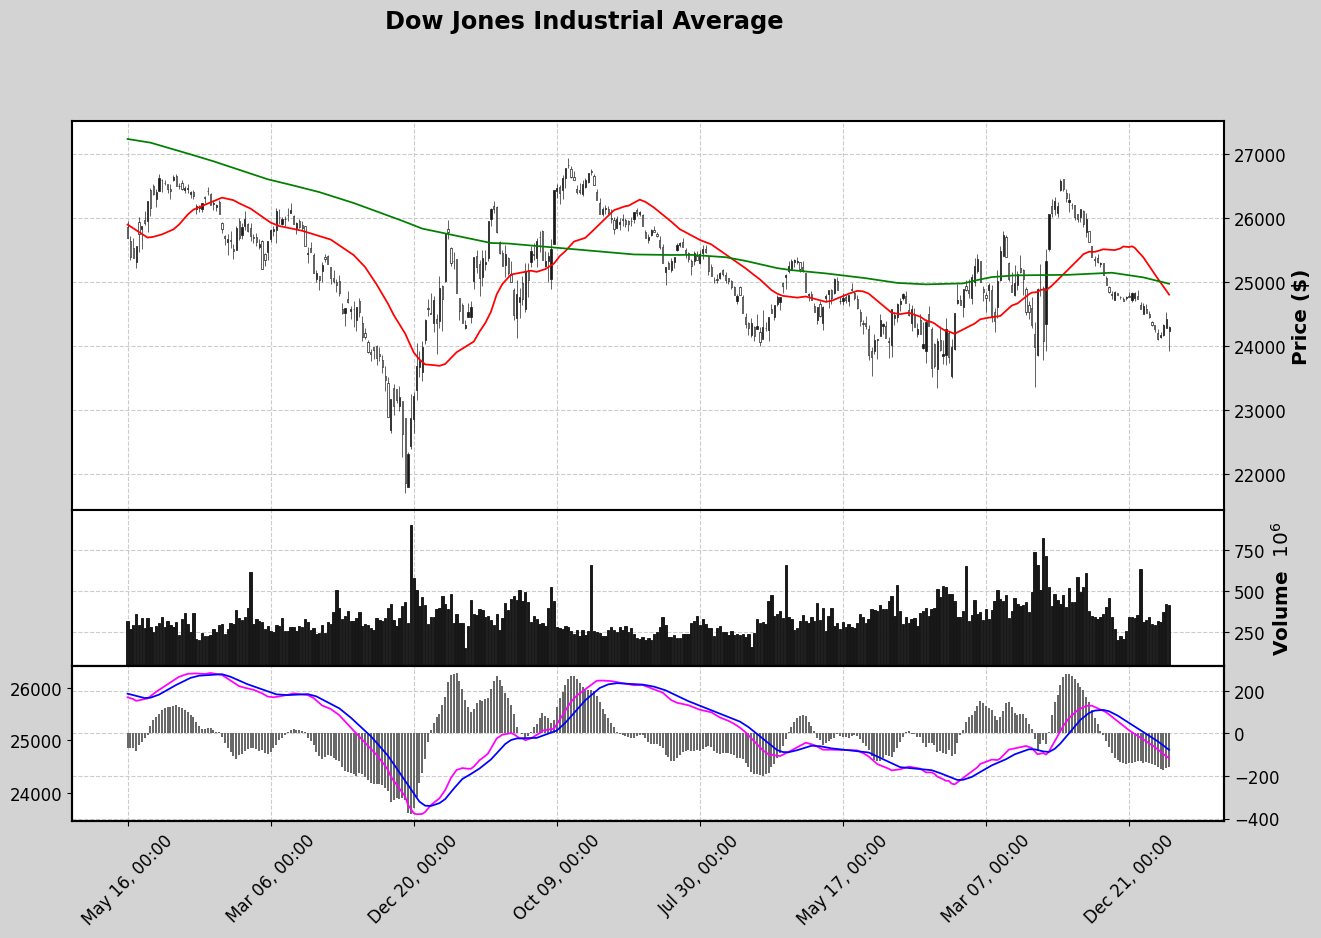

In [30]:
result_df.dropna(inplace=True)
span = 365
apd = [
        # MA's
        mpf.make_addplot(result_df['Short SMA'].tail(span), color='red'),
        mpf.make_addplot(result_df['Long SMA'].tail(span), color='green'),
         # MACD
        mpf.make_addplot(result_df['histogram'].tail(span),type='bar',width=0.7,panel=2,color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(result_df['macd'].tail(span),panel=2,color='fuchsia',secondary_y=True),
        mpf.make_addplot(result_df['signal'].tail(span),panel=2,color='b',secondary_y=True),
]

mpf.plot(result_df[['Open','High','Low','Close','Volume']].tail(span), 
         type='candle', 
         title='Dow Jones Industrial Average', 
         style=mpf.make_mpf_style(base_mpf_style='classic',rc={'figure.facecolor':'lightgray'}),
         ylabel='Price ($)',
         volume=True, 
         addplot=apd,
         figsize=(16,10));